In [1]:
import pandas as pd
import numpy as np
import pickle
import tabulate
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

with open('my_list.pkl', 'rb') as f:
    len_list = pickle.load(f)

In [3]:
df

,Time Stamps (s),Values,Labels,punc,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
0,0.535,0.0,M,,0.15681,0.00520,0.160,1.000,0.0,0.0,0.0,0.0
1,0.695,0.0,M,,0.06879,0.00319,0.200,0.160,-1.0,0.0,-5.0,0.0
2,0.895,-1.0,L,,0.13140,0.00393,0.130,0.200,0.0,-1.0,0.0,-5.0
3,1.025,-1.0,L,,0.00140,0.13393,0.230,0.130,0.0,0.0,0.0,0.0
4,1.255,-1.0,L,,0.11290,0.00060,0.120,0.230,1.5,0.0,12.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,24.596,-1.0,L,,0.06600,0.00700,0.065,0.155,0.0,0.0,0.0,0.0
1451,24.661,-1.0,L,,0.00100,0.07200,0.205,0.065,0.0,0.0,0.0,0.0
1452,24.866,-1.0,L,,0.00300,0.20400,0.060,0.205,0.0,0.0,0.0,0.0
1453,24.926,-1.0,L,,0.10800,0.00600,0.125,0.060,0.0,0.0,0.0,0.0


In [4]:
dataset = df.drop(df[df['punc'] == '!'].index)
# dataset.loc[dataset["punc"] == "!", "punc"] = ","

In [5]:
dataset.describe()

,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
count,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,21.10109,-0.135424,0.029049,0.056440,0.212919,0.210848,-0.002757,0.000689,-0.437322,-0.414018
std,14.59594,0.581697,2.563548,0.136123,0.215653,0.212864,0.625597,0.626704,4.983518,5.010746
min,0.13600,-1.000000,-64.880000,-0.404000,0.040000,0.040000,-2.000000,-2.000000,-22.222222,-22.222222
25%,9.30050,-0.500000,0.066000,0.005000,0.105000,0.105000,0.000000,0.000000,0.000000,0.000000
50%,19.21600,0.000000,0.107000,0.011000,0.140000,0.140000,0.000000,0.000000,0.000000,0.000000
75%,29.79550,0.000000,0.157700,0.048000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000
max,65.88000,1.000000,1.539000,1.478000,1.680000,1.680000,2.000000,2.000000,20.000000,20.000000


In [6]:
print("Features for \",\"")
dataset[dataset["punc"] == ","].describe()

Features for ","


,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
count,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,11.80425,-0.041667,0.231858,0.014775,0.227500,0.677083,0.208333,0.083333,0.273494,0.064975
std,8.75649,0.144338,0.292028,0.018642,0.205973,0.132964,0.752521,0.468718,4.928195,0.784548
min,1.48000,-0.500000,0.027900,0.001000,0.090000,0.325000,-1.000000,-0.500000,-9.523810,-1.538462
25%,5.91575,0.000000,0.097750,0.003700,0.108750,0.653750,-0.125000,-0.500000,-0.694444,-0.639983
50%,10.19200,0.000000,0.124550,0.006750,0.182500,0.725000,0.000000,0.250000,0.000000,0.331126
75%,14.44325,0.000000,0.170575,0.014900,0.217500,0.743750,1.000000,0.500000,2.543042,0.706635
max,30.23700,0.000000,0.957200,0.059000,0.850000,0.815000,1.500000,0.500000,9.090909,0.769231


In [7]:
print("Features for \".\"")
dataset[dataset["punc"] == "."].describe()[0:]

Features for "."


,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000
mean,26.582535,-0.220930,-4.726681,0.225481,0.329535,0.859070,0.267442,0.72093,0.925882,0.697519
std,14.435720,0.610448,14.188640,0.451711,0.347725,0.394062,0.580936,0.66639,3.309010,0.625711
min,6.961000,-1.000000,-64.880000,0.001000,0.080000,0.075000,-1.000000,-1.00000,-6.250000,-0.917431
25%,15.064000,-1.000000,0.052000,0.006500,0.120000,0.835000,0.000000,0.00000,0.000000,0.000000
50%,25.051000,0.000000,0.095000,0.015000,0.160000,0.990000,0.000000,1.00000,0.000000,0.865801
75%,34.812500,0.000000,0.151000,0.038000,0.250000,1.087500,1.000000,1.00000,1.000000,1.066674
max,65.880000,1.000000,0.882000,1.478000,1.000000,1.680000,1.000000,2.00000,9.523810,1.904762


In [8]:
print("Features for no punctuation")
dataset[dataset["punc"] == " "].describe()[0:]

Features for no punctuation


,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,21.012164,-0.133596,0.173793,0.051591,0.209201,0.186873,-0.012894,-0.022206,-0.485422,-0.452373
std,14.590568,0.583116,0.224858,0.110431,0.209594,0.163969,0.624051,0.613651,5.022898,5.102873
min,0.136000,-1.000000,0.000100,-0.404000,0.040000,0.040000,-2.000000,-2.000000,-22.222222,-22.222222
25%,9.178250,-0.500000,0.066000,0.005000,0.105000,0.105000,-0.500000,-0.500000,-0.616373,-0.659427
50%,19.172500,0.000000,0.108000,0.011050,0.140000,0.140000,0.000000,0.000000,0.000000,0.000000
75%,29.726000,0.000000,0.157600,0.048250,0.200000,0.190000,0.000000,0.000000,0.000000,0.000000
max,65.760000,1.000000,1.539000,1.084000,1.680000,1.000000,2.000000,2.000000,20.000000,20.000000


In [13]:
subset_dot = dataset[dataset["punc"] == "."]
x1 = subset_dot.describe().loc[["mean"]].reset_index(drop=True)

subset_comma = dataset[dataset["punc"] == ","]
x2 = subset_comma.describe().loc[["mean"]].reset_index(drop=True)

subset_space = dataset[dataset["punc"] == " "]
x3 = subset_space.describe().loc[["mean"]].reset_index(drop=True)

result_df = pd.concat([x1, x2, x3], keys=['.', ',', ' '])
result_df

,,Time Stamps (s),Values,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
.,0,26.582535,-0.220930,-4.726681,0.225481,0.329535,0.859070,0.267442,0.720930,0.925882,0.697519
",",0,11.804250,-0.041667,0.231858,0.014775,0.227500,0.677083,0.208333,0.083333,0.273494,0.064975
,0,21.012164,-0.133596,0.173793,0.051591,0.209201,0.186873,-0.012894,-0.022206,-0.485422,-0.452373


In [14]:
df = result_df.drop(columns=["Time Stamps (s)", "Values"])
result_df = df.T

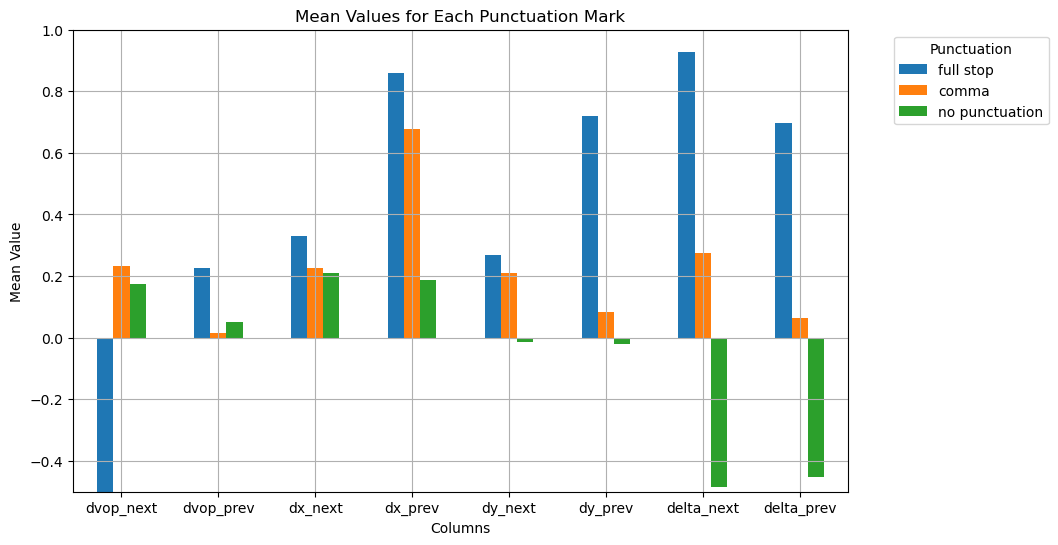

In [15]:
result_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Mean Values for Each Punctuation Mark')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.legend(title='Punctuation', bbox_to_anchor=(1.05, 1), loc='upper left', labels=["full stop", "comma", "no punctuation"])
plt.ylim([-0.5,1])
plt.grid()
plt.savefig("./figures/features1.png")
plt.show()